In [56]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
plt.style.use('fivethirtyeight') 
from pylab import rcParams
import datetime as datetime


In [57]:
# lendo dados da petrobras
start = '2015-01-01'
df = pd.DataFrame(DataReader('PETR4.SA', data_source = 'yahoo',
               start = start)['Adj Close'])

In [58]:
df.head()

,Adj Close
Date,
2015-01-02,6.457028
2015-01-05,5.905147
2015-01-06,5.711987
2015-01-07,5.981030
2015-01-08,6.367347


<AxesSubplot:title={'center':'Valores de PETR4 mensal desde 2018'}, xlabel='Date'>

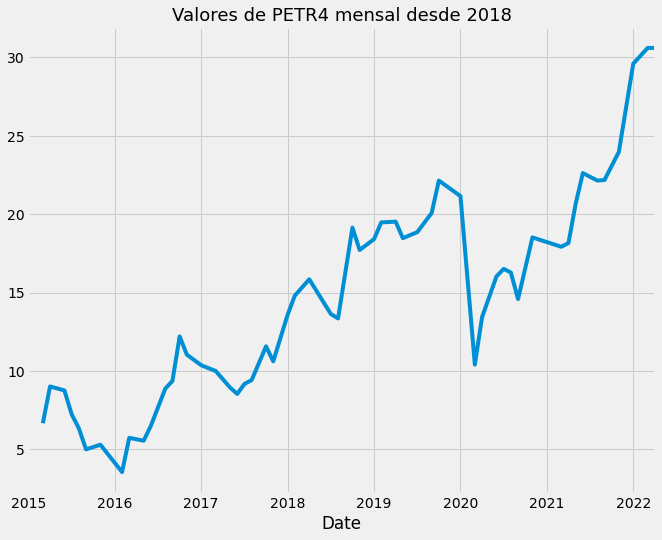

In [59]:
plt.figure(figsize= (10,8))
plt.title("Valores de PETR4 mensal desde 2018", fontsize = 18)
df["Adj Close"].asfreq('M').interpolate().plot()

In [60]:
# calculando a variação de um dia para o outro com o Adj Close
df['Change'] = df['Adj Close'].div(df['Adj Close'].shift())
df.head()

,Adj Close,Change
Date,,
2015-01-02,6.457028,NaN
2015-01-05,5.905147,0.914530
2015-01-06,5.711987,0.967290
2015-01-07,5.981030,1.047101
2015-01-08,6.367347,1.064590


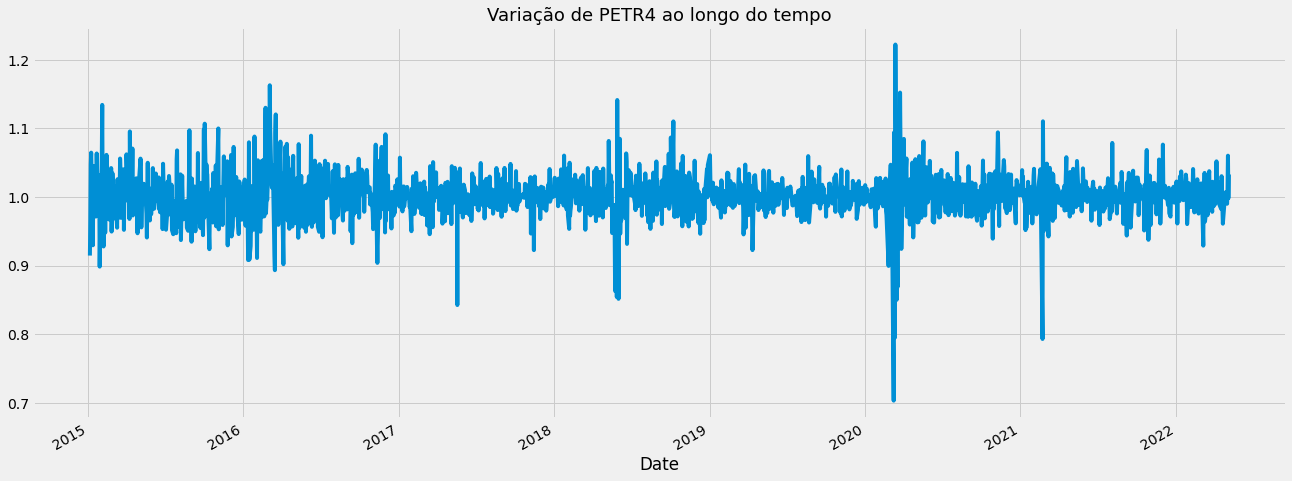

In [61]:
df['Change'].plot(figsize=(20,8))
_ = plt.title('Variação de PETR4 ao longo do tempo', fontsize = 18)

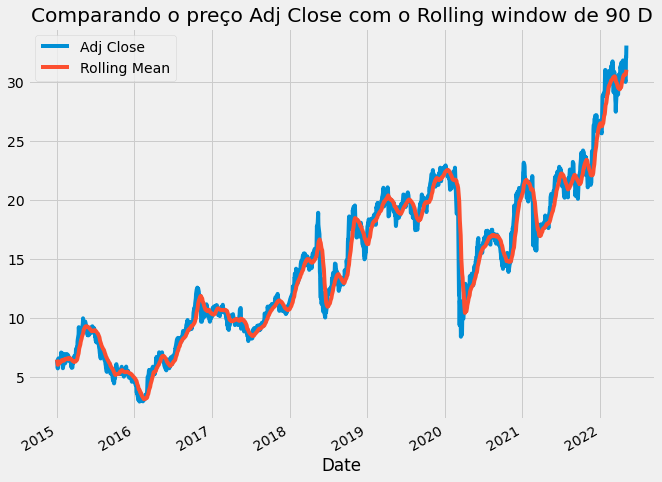

In [62]:
# Rolling window functions
plt.figure(figsize= (10,8))
rolling_df = df['Adj Close'].rolling('30D').mean()
df['Adj Close'].plot()
rolling_df.plot()
_ = plt.title('Comparando o preço Adj Close com o Rolling window de 90 D')
plt.legend(['Adj Close','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of Oracle stocks
plt.show()

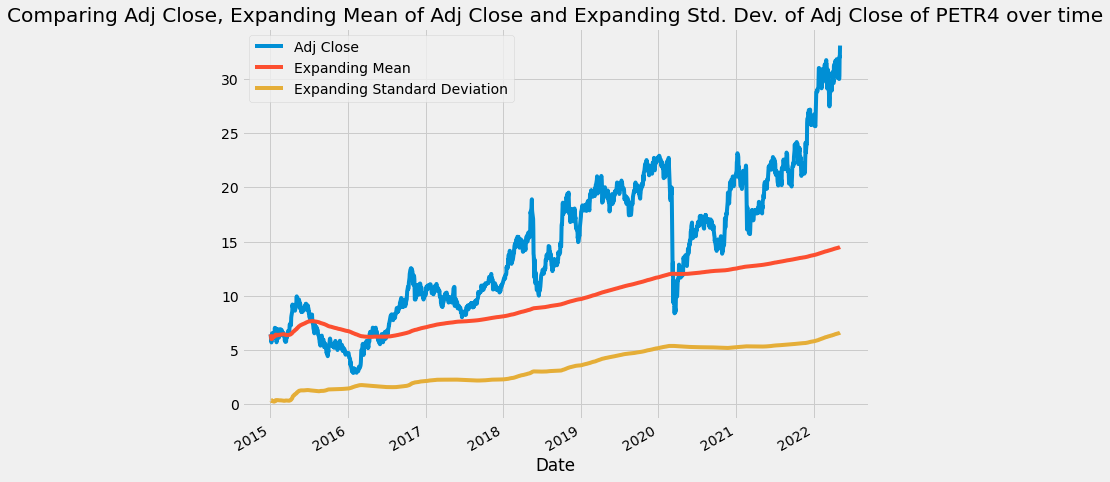

In [63]:
# Expanding window functions
plt.figure(figsize= (10,8))
df_mean = df['Adj Close'].expanding().mean()
df_std = df['Adj Close'].expanding().std()
df['Adj Close'].plot()
df_mean.plot()
df_std.plot()
_ = plt.title('Comparing Adj Close, Expanding Mean of Adj Close and Expanding Std. Dev. of Adj Close of PETR4 over time')
plt.legend(['Adj Close','Expanding Mean','Expanding Standard Deviation'])
plt.show()

Ainda não sei o que isso signiifca mas parece ser bacana essa análise. Vou estudar mais 



## Testar candlesticks graphics

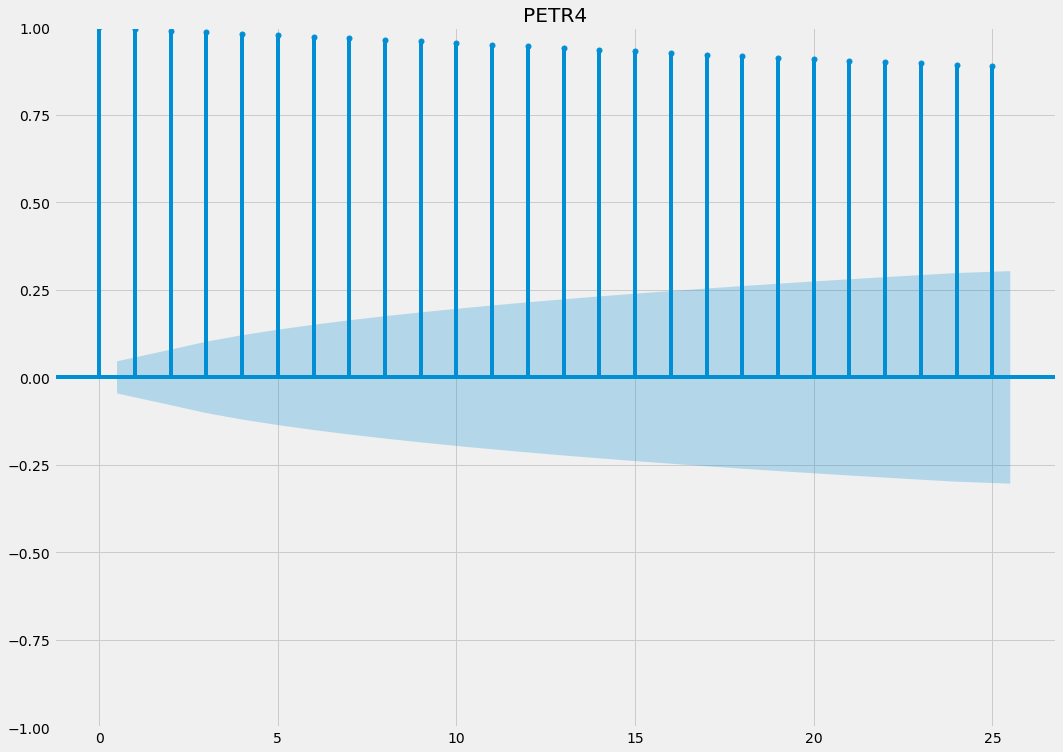

In [64]:
# Testando a autocorrelação
plot_acf(df["Adj Close"],lags=25,title="PETR4")
plt.show()

 Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.


 Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

C:\Users\Samuel Natividade\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 720x576 with 0 Axes>

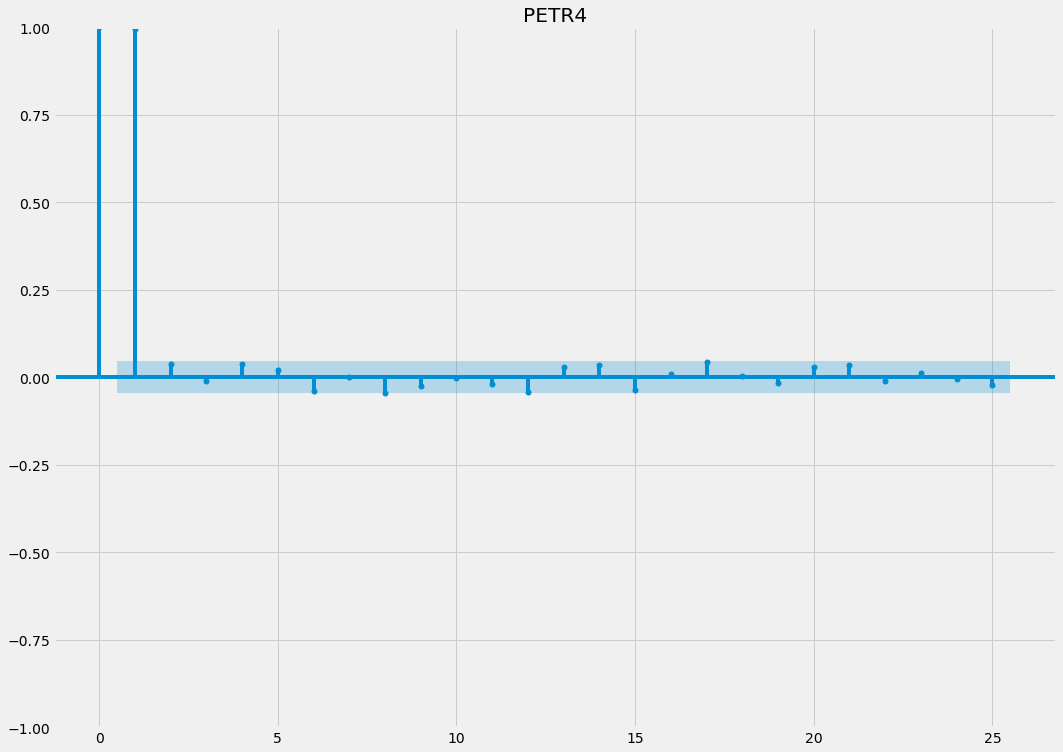

In [65]:
# Testando a autocorrelação
plt.figure(figsize = (10,8))
plot_pacf(df["Adj Close"],lags=25,title="PETR4")
plt.show();

O primeiro lag são estatisticamente significantes

<AxesSubplot:xlabel='Date'>

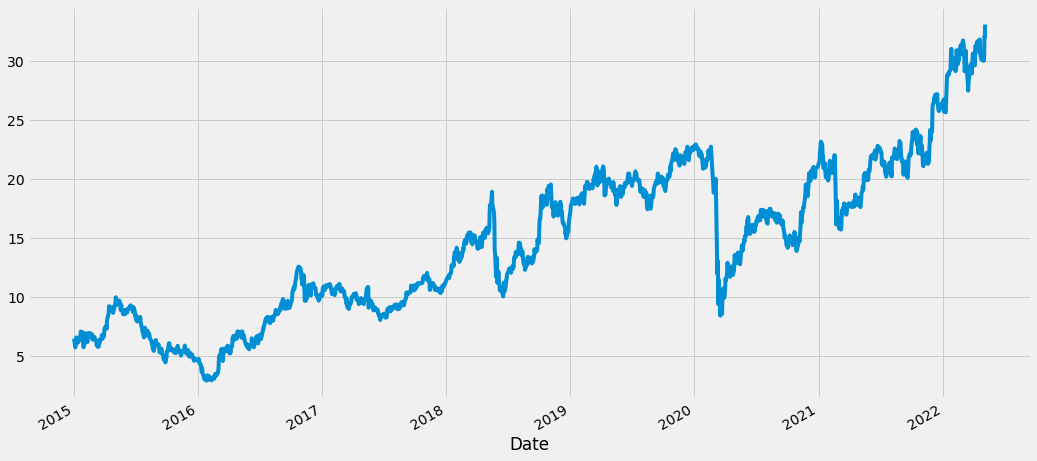

In [66]:
## Time Series decomposition and random walks
df['Adj Close'].plot(figsize = (16,8))

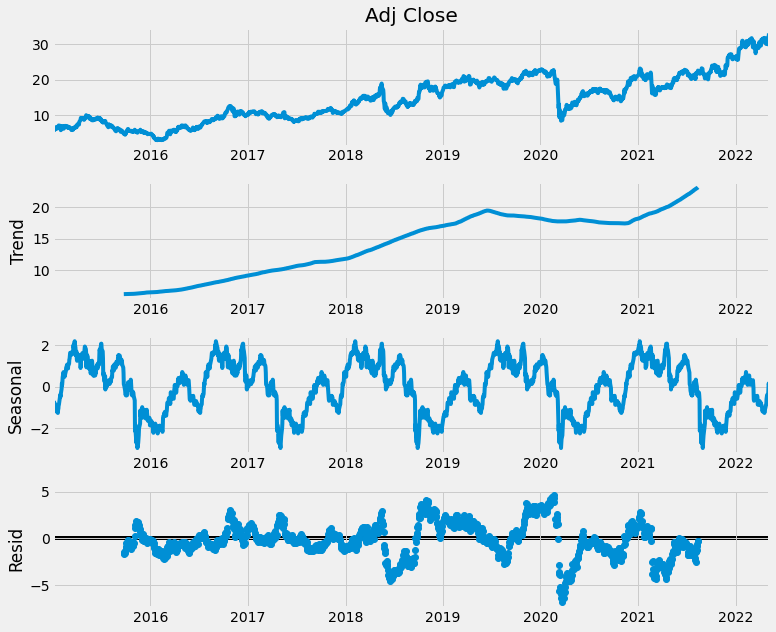

In [67]:
rcParams['figure.figsize'] = 11, 9
decomposed_petr = sm.tsa.seasonal_decompose(df['Adj Close'],period = 360) # The frequncy is annual
figure = decomposed_petr.plot()
plt.show()

Existe uma tendencia aumento no preço na ação desde o início de 2021

Além disso, existe uma tendencia sazonal de altos e baixos muito altas em certos períodos de tempo.

A partir do ano de 2020 os resíduos ficaram bem abaixos, o que pode representar bastante outliers/valores missing

In [68]:
# fazendo o teste de adfuller
#An augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. 
# It is basically Dickey-Fuller test with more lagged changes on RHS

adf = adfuller(df["Adj Close"])
print("p-value da Petrobras: {}".format(float(adf[1])))

p-value da Petrobras: 0.9355727905338764


Esse valor de p-valor pode ser considerado uma random walk

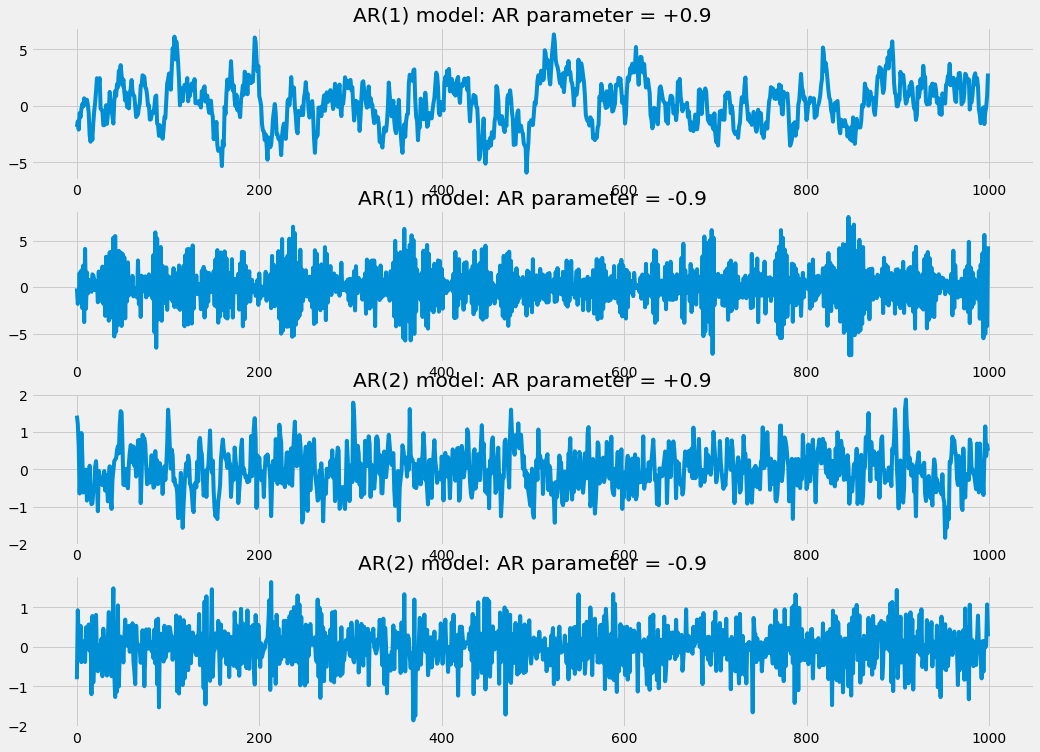

In [69]:
## simulando o modelo AR
# AR(1) MA(1) model:AR parameter = +0.9
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()


In [70]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(sim1, order=(1,0,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1393.526
Date:                Sat, 07 May 2022   AIC                           2793.053
Time:                        15:41:17   BIC                           2807.776
Sample:                             0   HQIC                          2798.648
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2883      0.240      1.203      0.229      -0.181       0.758
ar.L1          0.8721      0.015     57.133      0.000       0.842       0.902
sigma2         0.9491      0.042     22.811      0.0

In [71]:
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 0.9558104600627865.


In [72]:
# Predicting humidity level of Montreal
adj_close = ARIMA(df["Adj Close"].iloc[:].values, order=(1,0,0))
# ajuste do modelo AR
res = adj_close.fit()

In [73]:
# dia de incio e fim das previsões
#start_date = datetime.date.today() + datetime.timedelta(60)
#end_date = datetime.date.today()
start_date = len(df) - 60
end_date = len(df) - 1

In [74]:
# realizando previsões
# predito é um array dos últimos 60 dias
predito = res.predict(start = start_date, end = end_date)

In [75]:
# filtrando dados dos últimos 60 dias
ultimos_60_dias = df[:][-60:].index

In [76]:
# criando um dataframe para o predito
df_predito = pd.DataFrame({'Date' : ultimos_60_dias,
            'y_hat': predito})
df_predito.head()

,Date,y_hat
0,2022-02-08,29.407783
1,2022-02-09,29.115133
2,2022-02-10,29.224876
3,2022-02-11,29.672992
4,2022-02-14,30.880167


In [77]:
## merge com o df e df_predito
df_new = df.reset_index()
df_new.head()

,Date,Adj Close,Change
0,2015-01-02,6.457028,NaN
1,2015-01-05,5.905147,0.914530
2,2015-01-06,5.711987,0.967290
3,2015-01-07,5.981030,1.047101
4,2015-01-08,6.367347,1.064590


In [78]:
# juntando as duas tabelas
df_new = df_new.merge(df_predito, left_on = 'Date', right_on = 'Date', how = 'left')

In [79]:
df_new.head()

,Date,Adj Close,Change,y_hat
0,2015-01-02,6.457028,NaN,NaN
1,2015-01-05,5.905147,0.914530,NaN
2,2015-01-06,5.711987,0.967290,NaN
3,2015-01-07,5.981030,1.047101,NaN
4,2015-01-08,6.367347,1.064590,NaN


No handles with labels found to put in legend.


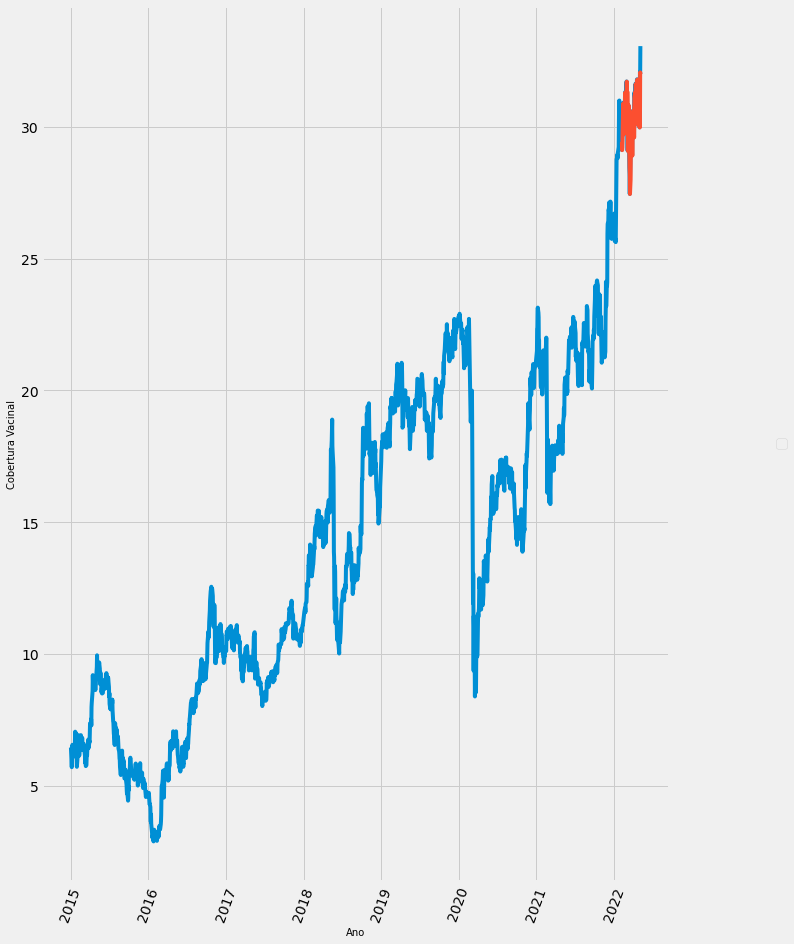

In [86]:
# vamos plotar a situação geral da região Norte
plt.figure(figsize = (10,15))
ax = sns.lineplot(data = df_new, x = 'Date', y = 'Adj Close')
ax = sns.lineplot(data = df_new, x = 'Date', y = 'y_hat')
#plt.title('Cobertura Vacinal do Pará e Amazonas', fontsize = 12)
plt.grid(True)
ax.legend(loc='right', bbox_to_anchor=(1.2, 0.5))
plt.xticks(rotation = 70)
ax.set_ylabel('Cobertura Vacinal', fontsize = 10)
ax.set_xlabel('Ano', fontsize = 10)
plt.show()

In [85]:
df_new_ultimos_2_meses = df_new[:][-60:]

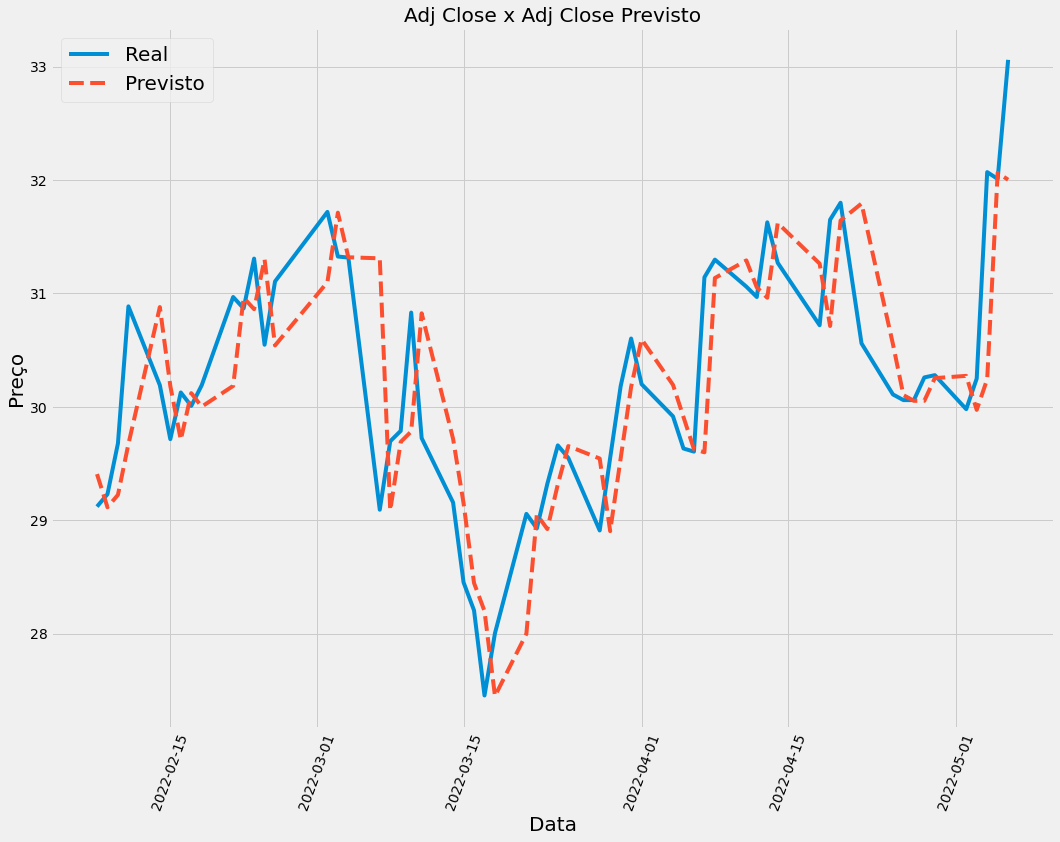

In [131]:
plt.title("Adj Close x Adj Close Previsto")
plt.plot(df_new_ultimos_2_meses['Date'],df_new_ultimos_2_meses['Adj Close'])
plt.xlabel('Data', fontsize = 20)
plt.ylabel('Preço',fontsize = 20)
plt.plot(df_new_ultimos_2_meses['Date'],df_new_ultimos_2_meses['y_hat'], '--')
plt.legend(["Real","Previsto"],fontsize = 20, loc = 'best')
plt.xticks(rotation = 70)
plt.grid(True);

In [120]:
## Calculando o erro
# raiz de 2  da diferença real e previsto >>  elevado a 2, dividido pelos pontos (60 pontos) e faz a raiz quadrada desse valor 
rmse = math.sqrt(mean_squared_error(df_new_ultimos_2_meses['Adj Close'], df_new_ultimos_2_meses['y_hat']))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 0.6833041037885335.


In [ ]:
lista_AR = [1,2,3,4]
lista_MA = [1,2,3,4]


df_temp = pd.DataFrame()


for AR in lista_AR:
    for MA in lista_MA:
        temp = pd.DataFrame()
        model = ARIMA(sim1, order=(AR,0,MA))